In [1]:
!mkdir data
%cd data

!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

%cd ..

d:\AIVietNam\2024\aio-2024-hw\module-4\12_10_2024_M04W03\data


A subdirectory or file data already exists.


d:\AIVietNam\2024\aio-2024-hw\module-4\12_10_2024_M04W03


Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: d:\AIVietNam\2024\aio-2024-hw\module-4\12_10_2024_M04W03\data\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<?, ?B/s]


Sales = $\Beta_0$ + $\Beta_1$ * TV + $\Beta_2$ * Radio + $\Beta_3$ * Newspaper

Mỗi chromosome đại diện cho 1 tập hợp các hệ số ($\Beta_0$, $\Beta_1$, $\Beta_2$, $\Beta_3$)

=> Số lượng chromosome = Số lượng features + 1 (cho $\Beta_0$)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(file_path  = "data/advertising.csv"):
    data = np.genfromtxt(file_path, delimiter = ",", skip_header = 1)
    X_features = data[:, :3]
    y = data[:, 3]
    X_b = np.hstack([np.ones((X_features.shape[0], 1)), X_features])
    return X_b, y

X_features, y = load_data_from_file()
X_features[:5, :]


array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [3]:
print(f"y: {y}")
print(y.shape)

y: [22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6 12.6 17.4  9.2 13.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  17.5  5.6 20.5  9.7 17.  15.  20.9
 18.9 10.5 21.4 11.9 13.2 17.4 11.9 17.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 17.9  8.5 16.1 10.6 23.2 19.8  9.7 16.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 20.7 14.  16.  11.3 11.  13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 17.3 11.3 13.6
 21.7 20.2 12.  16.  12.9 16.7 14.   7.3 19.4 22.2 11.5 16.9 16.7 20.5
 25.4 17.2 16.7 23.8 19.8 19.7 20.7 15.   7.2 12.   5.3 19.8 18.4 21.8
 17.1 20.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  16.6 15.2 19.7 10.6
  6.6 11.9 24.7  9.7  1.6 17.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 12.3 10.3 18.2 25.4 10.9 10.1 16.1 11.6 16.6 16.
 20.6  3.2 15.3 10.1  7.3 12.9 16.4 13.3 19.9 18.  11.9 16.9  8.  17.2
 17.1 20.   8.4 17.5  7.6 16.7 16.5 27.  20.2 16.7 16.8 17.6 15.5 17.2
  8.7 26.2 17.6 22.6 10.3 17.3 20.9  6.7 10.8 11.9  5.9 19.6 17.3  7.6
 14.

In [4]:
def create_individual(n=4, bound=10):
    """
    Create a chromosome with n genes, each having a value in the range [-bound/2, bound/2]
    
    Args:
        n (int): Number of genes in the chromosome (default=4)
        bound (float): Range boundary (default=10)
        
    Returns:
        list: A list of n random values representing a chromosome
    """
    individual = np.random.uniform(-bound/2, bound/2, n).tolist()

    return individual

individual = create_individual()
individual

[-2.789303925427955,
 2.484197976886221,
 -2.6752079119360728,
 0.9393434053842986]

In [5]:
def compute_loss(X_data, y_data, individual):
    theta = np.array(individual)
    y_hat = X_data.dot(theta)
    loss = (y_hat - y_data) ** 2
    loss_mean = np.mean(loss)
    return loss_mean

def compute_fitness(X_data, y_data, individual):
    loss = compute_loss(X_data, y_data, individual)
    # nghịch đảo giá trị loss
    fitness_value = 1 / (loss + 1)
    return fitness_value

X_features, y = load_data_from_file()
print(f'X_features.shape: {X_features.shape}')
print(f'y.shape: {y.shape}')
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(X_features, y, individual)
fitness_score

X_features.shape: (200, 4)
y.shape: (200,)


np.float64(1.0185991537088997e-06)

In [6]:
def crossover(indi1, indi2, crossover_rate = 0.9):
    indi1_new = indi1.copy()
    indi2_new = indi2.copy()
    
    if np.random.random() < crossover_rate:
        size = len(indi1)
        
        crossover_point = np.random.randint(1, size)
        
        for i in range(crossover_point, size):
            indi1_new[i], indi2_new[i] = indi2_new[i], indi1_new[i]
    
    return indi1_new, indi2_new


indi1 = [4.09, 4.82, 3.10, 4.02]
indi2 = [3.44, 2.57, -0.79, -2.41]

indi1, indi2 = crossover(indi1, indi2, 2.0)
print(f"indi1: {indi1}")
print(f"indi2: {indi2}")    

indi1: [4.09, 4.82, 3.1, -2.41]
indi2: [3.44, 2.57, -0.79, 4.02]


In [7]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    
    for i in range(len(individual_m)):
        if np.random.random() < mutation_rate:
            # Sử dụng sigma (độ lệch chuẩn) nhỏ để thay đổi nhẹ gene
            # Gaussian noise với mean=0, sigma=1
            noise = np.random.normal(0, 1)
            individual_m[i] += noise
    return individual_m


before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(f"before_individual: {before_individual}")
print(f"after_individual: {after_individual}")
print(before_individual == after_individual)

before_individual: [4.09, 4.82, 3.1, 4.02]
after_individual: [6.192883548158264, 5.772056080753707, 4.684775810521497, 4.722417975167245]
False


In [8]:
def init_population(m):
    population = [create_individual() for _ in range(m)]
    return population

def selection(sorted_old_population, m = 100):
    idx1 = random.randint(0, m - 1)
    idx2 = 0
    while idx1 == idx2:
        idx2 = random.randint(0, m - 1)
    
    indi_s = sorted_old_population[idx1]
    if idx2 > idx1:
        indi_s = sorted_old_population[idx2]
    return indi_s

def create_new_population(X_data, y_data, old_population, elitism=2, gen=1):
    """
    Create a new population based on selection, crossover, and mutation, 
    with elitism to preserve the best individuals
    
    Args:
        X_data: Training features
        y_data: Training target values
        old_population (list): Current population of individuals
        elitism (int): Number of top individuals to preserve (default=2)
        gen (int): Current generation number (default=1)
        
    Returns:
        list: A new population after selection, crossover, and mutation
    """
    m = len(old_population)
    
    def fitness_key(individual):
        return compute_fitness(X_data, y_data, individual)
    
    sorted_population = sorted(old_population, key=fitness_key)
    
    if gen % 1 == 0:
        print(" Best loss:", compute_loss(X_data, y_data, sorted_population[m - 1]), 
              " with chromosome:", sorted_population[m - 1])
        
    new_population = []
    
    # Create new individuals until we reach required size (excluding elitism spots)
    while len(new_population) < m - elitism:
        # Selection - select two parents
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)
        
        # Crossover - create offspring
        offspring1, offspring2 = crossover(parent1, parent2)
        
        # Mutation - introduce variations
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)
        
        # Add offspring to new population
        new_population.append(offspring1)
        if len(new_population) < m - elitism:  # Check to avoid exceeding size
            new_population.append(offspring2)
    
    # Add elite individuals (best performers) directly to next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)
    
    return new_population
    

In [9]:
def run_GA():
    n_generations = 100
    m = 600
    X_features, y = load_data_from_file()
    population = init_population(m)
    losses_list = []
    
    for i in range(n_generations):
        population = create_new_population(X_features, y, population)
        
        best_chromosome = max(population, key=lambda ind: compute_fitness(X_features, y, ind))
        best_loss = compute_loss(X_features, y, best_chromosome)
        
        losses_list.append(best_loss)
        
        if (i + 1) % 10 == 0:
            print(f"Generation {i+1}/{n_generations}, Best Loss: {best_loss}")
            print(f"Best chromosome: {best_chromosome}")
    
    best_chromosome = max(population, key=lambda ind: compute_fitness(X_features, y, ind))
    best_loss = compute_loss(X_features, y, best_chromosome)

    print("\nGA optimization completed!")
    print(f"Best solution found: {best_chromosome}")
    print(f"Final loss: {best_loss}")
            
    return losses_list, population

losses, population = run_GA()

 Best loss: 777.7983704555717  with chromosome: [4.399789709696972, -0.05463652747056358, 1.6022685117248177, -0.9377534212777494]
 Best loss: 561.3756030718382  with chromosome: [3.226891238119297, -0.020739374830997193, -0.9022283666735778, 0.6756847236611421]
 Best loss: 561.3756030718382  with chromosome: [3.226891238119297, -0.020739374830997193, -0.9022283666735778, 0.6756847236611421]
 Best loss: 561.3756030718382  with chromosome: [3.226891238119297, -0.020739374830997193, -0.9022283666735778, 0.6756847236611421]
 Best loss: 561.3756030718382  with chromosome: [3.226891238119297, -0.020739374830997193, -0.9022283666735778, 0.6756847236611421]
 Best loss: 561.3756030718382  with chromosome: [3.226891238119297, -0.020739374830997193, -0.9022283666735778, 0.6756847236611421]
 Best loss: 473.35717899004385  with chromosome: [4.399789709696972, -0.05463652747056358, -0.45249064005225237, 0.9803589340046379]
 Best loss: 473.35717899004385  with chromosome: [4.399789709696972, -0.0546

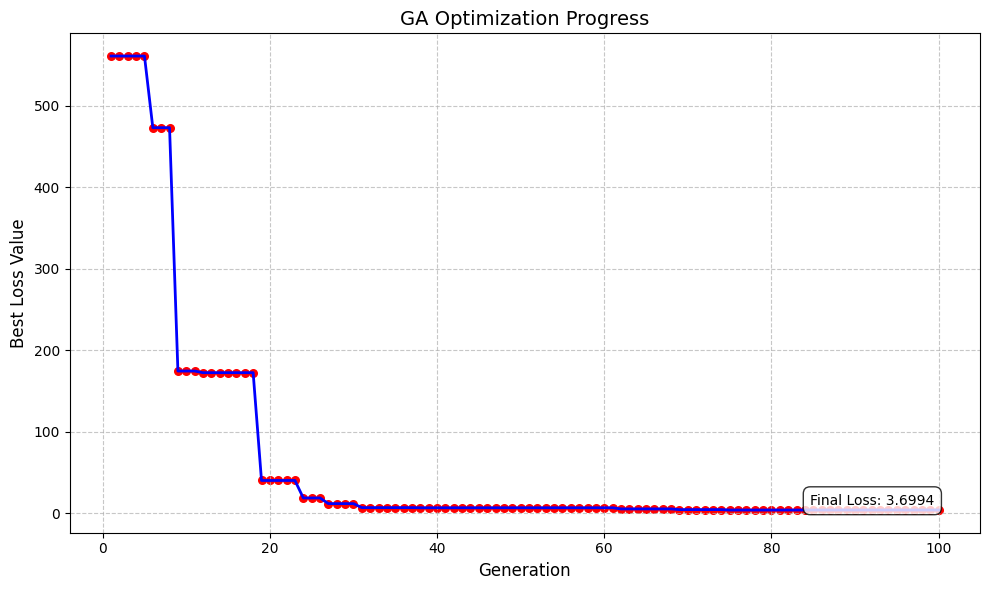

In [10]:
def visualize_loss(losses_list):
    """
    Visualize the progression of loss values over generations
    
    Args:
        losses_list (list): List of loss values from each generation
    """
    plt.figure(figsize=(10, 6))
    generations = range(1, len(losses_list) + 1)

    # Plot the loss progression
    plt.plot(generations, losses_list, 'b-', linewidth=2)
    plt.scatter(generations, losses_list, color='red', s=30)

    # Add labels and title
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Loss Value', fontsize=12)
    plt.title('GA Optimization Progress', fontsize=14)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add text showing final loss value
    final_loss = losses_list[-1]
    plt.text(0.95, 0.05, f'Final Loss: {final_loss:.4f}',
             transform=plt.gca().transAxes,
             ha='right', va='bottom',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()


visualize_loss(losses)

[5.807678448559716, 0.05867808437708627, 0.0618821652067616, -0.021671632570672728]


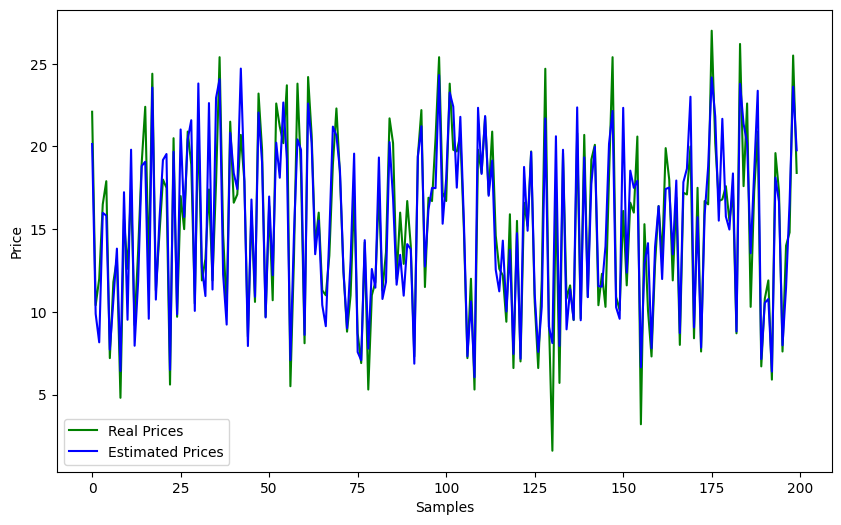

In [11]:
def visualize_predict_gt():
    """
    Visualize comparison between ground truth and predicted values
    """
    # Load data
    X_features, y = load_data_from_file()

    # Sort population by fitness and get best chromosome
    sorted_population = sorted(
        population, key=lambda ind: compute_fitness(X_features, y, ind))
    best_chromosome = sorted_population[-1]
    print(best_chromosome)

    # Convert to numpy array
    theta = np.array(best_chromosome)

    # Calculate estimated prices
    estimated_prices = []
    for feature in X_features:
        # Calculate predicted price using linear model: y = X * theta
        predicted_price = np.dot(feature, theta)
        estimated_prices.append(predicted_price)

    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()


visualize_predict_gt()